In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
#  to see a concise summary of our dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   trip_ID                          12654 non-null  object 
 1   visitor_nation                   12424 non-null  object 
 2   age_bracket                      12646 non-null  object 
 3   travelling_with                  11917 non-null  object 
 4   female_count                     12652 non-null  float64
 5   male_count                       12650 non-null  float64
 6   key_activity                     12526 non-null  object 
 7   trip_purpose                     12654 non-null  object 
 8   first_time_visitor               12555 non-null  object 
 9   mainland_nights                  12654 non-null  int64  
 10  island_nights                    12654 non-null  int64  
 11  tour_arrangement                 12654 non-null  object 
 12  transport_package_

In [4]:
# to see the number of columns and the number of rows in our data frame
train_data.shape

(12654, 25)

In [5]:
# to drop the duplicates if any
train_data.drop_duplicates(inplace = True)
train_data.shape

(12654, 25)

In [6]:
columns_to_drop = ['trip_ID', 'source_of_info', 'weather_at_arrival', 'special_requirements']

In [7]:
train_data.drop(columns=columns_to_drop, inplace=True)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12424 non-null  object 
 1   age_bracket                      12646 non-null  object 
 2   travelling_with                  11917 non-null  object 
 3   female_count                     12652 non-null  float64
 4   male_count                       12650 non-null  float64
 5   key_activity                     12526 non-null  object 
 6   trip_purpose                     12654 non-null  object 
 7   first_time_visitor               12555 non-null  object 
 8   mainland_nights                  12654 non-null  int64  
 9   island_nights                    12654 non-null  int64  
 10  tour_arrangement                 12654 non-null  object 
 11  transport_package_international  12507 non-null  object 
 12  package_accomodati

In [9]:
# Display the number of nulls in each column
null_counts = train_data.isnull().sum()
print(null_counts)

visitor_nation                      230
age_bracket                           8
travelling_with                     737
female_count                          2
male_count                            4
key_activity                        128
trip_purpose                          0
first_time_visitor                   99
mainland_nights                       0
island_nights                         0
tour_arrangement                      0
transport_package_international     147
package_accomodation                143
food_package                        171
transport_package_mx                  0
sightseeing_package                   0
guided_tour_package                   0
insurance_package                   236
days_before_booked                 1553
tour_length                         402
category                             34
dtype: int64


In [10]:
null_value_percentages = (train_data.isna().sum()/train_data.shape[0])*100
null_value_percentages

,0
visitor_nation,1.817607
age_bracket,0.063221
travelling_with,5.824245
female_count,0.015805
male_count,0.031611
key_activity,1.011538
trip_purpose,0.000000
first_time_visitor,0.782361
mainland_nights,0.000000
island_nights,0.000000


In [11]:
categorical_columns_raw = ['visitor_nation', 'age_bracket', 'travelling_with', 'key_activity',
               'first_time_visitor', 'transport_package_international', 'package_accomodation',
               'food_package', 'insurance_package']

In [12]:
# Filling the rows with NaN values with the mode of their respective columns
for column in categorical_columns_raw:
    mode_train = train_data[column].mode()[0]
    train_data[column].fillna(mode_train, inplace=True)

<ipython-input-12-4163581302>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(mode_train, inplace=True)


In [13]:
train_data[categorical_columns_raw].head(10)

,visitor_nation,age_bracket,travelling_with,key_activity,first_time_visitor,transport_package_international,package_accomodation,food_package,insurance_package
0,FRANCE,45-64,With Spouse and Children,Beach Tourism,Yes,No,No,No,No
1,KENYA,45-64,Alone,Conference Tourism,Yes,No,No,No,No
2,SOUTH AFRICA,25-44,With Other Friends/Relatives,Cultural Tourism,No,No,No,No,No
3,ITALY,25-44,With Spouse,Widlife Tourism,Yes,No,Yes,Yes,No
4,ITALY,25-44,With Spouse,Beach Tourism,Yes,Yes,Yes,Yes,No
5,ZIMBABWE,25-44,With Other Friends/Relatives,Wildlife Tourism,Yes,No,No,No,No
6,INDIA,25-44,With Spouse,Hunting Tourism,No,No,No,No,No
7,KENYA,45-64,Alone,Conference Tourism,No,No,No,No,No
8,AUSTRIA,18-24,With Spouse,Widlife Tourism,Yes,No,No,No,No
9,KENYA,25-44,Alone,Beach Tourism,No,No,No,No,No


In [14]:
'''The convert_ranges function is converting input values into numerical representations. If the value is missing (NaN), it is returning NaN.
For values containing a hyphen (-), which represent a range (e.g., "5-10"), it is splitting the string, calculating the average of the two numbers, and returning it.
If the value contains a plus sign (+), it is treating it as a single number (e.g., "20+"), removing the plus sign, and returning the number as a float.
For all other cases, it is directly converting the input to a float.'''

def convert_ranges(cell):
    if pd.isna(cell):
        return np.nan
    if '-' in str(cell):
        low, high = cell.split('-')
        return (float(low) + float(high)) / 2
    elif '+' in str(cell):
        return float(cell.replace('+', ''))
    else:
        return float(cell)

In [15]:
train_data['days_before_booked'] = train_data['days_before_booked'].apply(convert_ranges)
train_data['tour_length'] = train_data['tour_length'].apply(convert_ranges)

In [16]:
train_data[['days_before_booked', 'tour_length']]

,days_before_booked,tour_length
0,NaN,30.0
1,22.5,30.0
2,90.0,30.0
3,11.0,NaN
4,90.0,10.5
...,...,...
12649,NaN,30.0
12650,75.5,10.5
12651,90.0,3.5
12652,75.5,10.5


In [17]:
numerical_columns_raw = ['female_count', 'male_count', 'days_before_booked', 'tour_length']

In [18]:
# Here we are filling missing values in the specified numerical columns of train_data with the median value of each respective column and applying this operation across all columns in numerical_columns_raw.
for column in numerical_columns_raw:
    median_train = train_data[column].median()
    train_data[column].fillna(median_train, inplace=True)

<ipython-input-18-3921047252>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(median_train, inplace=True)


In [19]:
train_data[numerical_columns_raw].head(10)

,female_count,male_count,days_before_booked,tour_length
0,1.0,2.0,75.5,30.0
1,1.0,0.0,22.5,30.0
2,2.0,0.0,90.0,30.0
3,1.0,1.0,11.0,10.5
4,1.0,1.0,90.0,10.5
5,0.0,2.0,75.5,10.5
6,1.0,1.0,90.0,30.0
7,0.0,1.0,90.0,10.5
8,1.0,1.0,75.5,10.5
9,0.0,1.0,75.5,3.5


In [20]:
def feature_engineering(data):
    # data['total_companions'] = data['female_count'] + data['male_count']
    # data['island_to_mainland_ratio'] = data['island_nights'] / (data['mainland_nights'] + 1)  # Avoid division by zero
    # data['number_of_island_days'] = data['island_nights'] + data['mainland_nights']

    activity_count_map = data['key_activity'].value_counts().to_dict()
    data['activity_count'] = data['key_activity'].map(activity_count_map)

    # age_count_map = data['age_bracket'].value_counts().to_dict()
    # data['age_count'] = data['age_bracket'].map(age_count_map)

    # trip_count_map = data['trip_purpose'].value_counts().to_dict()
    # data['trip_count'] = data['trip_purpose'].map(trip_count_map)

    data['avg_days_before_booked_by_age'] = data.groupby('age_bracket')['days_before_booked'].transform('mean')

    # data['avg_tour_length_by_age'] = data.groupby('age_bracket')['tour_length'].transform('mean')
    data['avg_tour_length_by_activity'] = data.groupby('key_activity')['tour_length'].transform('mean')

    data['days_per_activity'] = data['tour_length'] / (data['activity_count'] + 1)  # Avoid divide by zero

    # data.drop(columns = ["female_count", "male_count"])
    # data.drop(columns = ["island_nights", "mainland_nights"])
    return data

In [21]:
train_data = feature_engineering(train_data)

In [22]:
train_data.dropna(subset=['category'], inplace=True)

In [23]:
categorical_columns = ['visitor_nation', 'age_bracket', 'travelling_with', 'key_activity',
                       'trip_purpose', 'first_time_visitor', 'tour_arrangement',
                       'transport_package_international', 'package_accomodation',
                       'food_package', 'transport_package_mx', 'sightseeing_package',
                       'guided_tour_package', 'insurance_package']

numerical_columns = ['female_count', 'male_count', 'mainland_nights', 'island_nights',
                     'days_before_booked', 'tour_length', 'activity_count','avg_days_before_booked_by_age','days_per_activity']

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [25]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class ObjectToCategoryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, train_data, y=None):
        return self

    def transform(self, train_data, y=None):
        # Convert object columns to category
        for col in train_data.select_dtypes(include='object').columns:
            train_data[col] = train_data[col].astype('category')
        return train_data

In [27]:
numerical_transformer = StandardScaler()


categorical_transformer = ImbPipeline(steps=[
    ('object_to_category', ObjectToCategoryTransformer()),  # Converts to category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))      # One-hot encoding
])

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

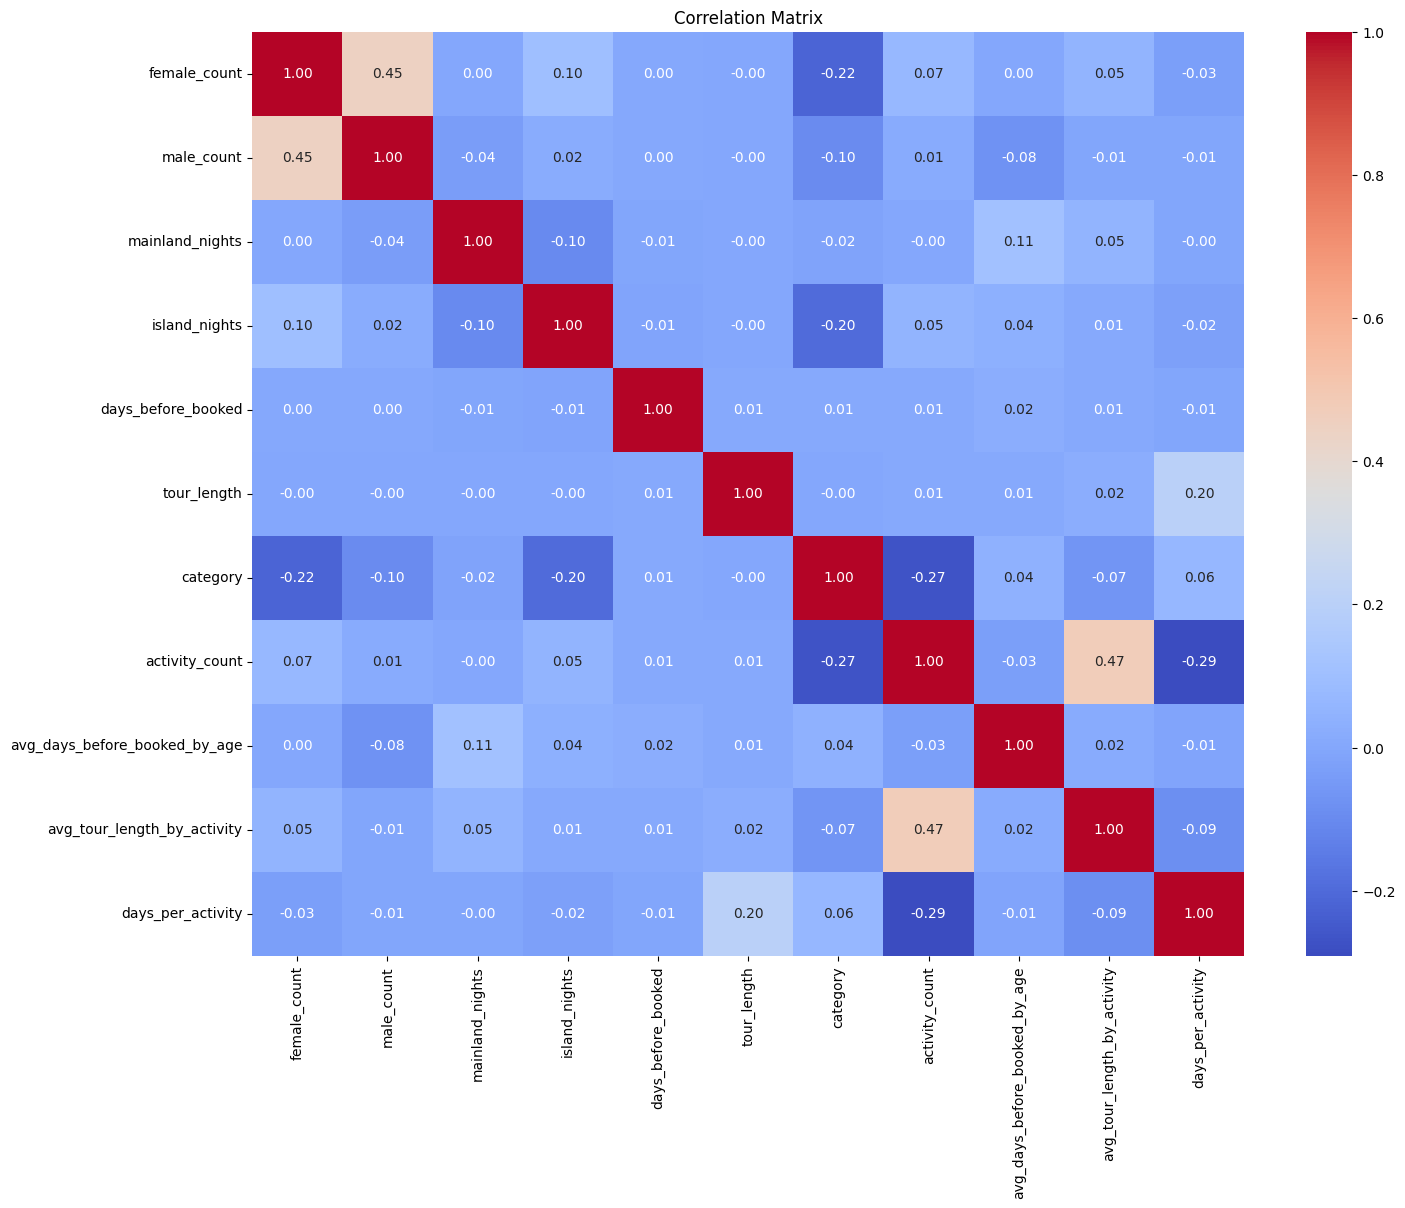

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap for better visualization
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = train_data.drop('category', axis=1)
y = train_data['category']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

In [40]:
from sklearn.ensemble import RandomForestClassifier


rf1_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    random_state=42,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5
)





In [41]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
pipeline_rf1 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', rf1_model)
])


In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,
    random_state=42
)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    p=2,
)

In [44]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [45]:
# Using the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42

)

In [46]:
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', rf_model)
])


In [48]:
pipeline_knn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', knn_model)
])

In [49]:
pipeline_rf1 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', rf1_model)
])

In [50]:
pipeline_dt = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', dt_model)
])

In [51]:
pipeline_rf1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['female_count', 'male_count',
                                                   'mainland_nights',
                                                   'island_nights',
                                                   'days_before_booked',
                                                   'tour_length',
                                                   'activity_count',
                                                   'avg_days_before_booked_by_age',
                                                   'days_per_activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('object_to_category',
                                                                   ObjectToCategoryTransformer()),
                                                                  ('onehot',
                                                                   OneHotE...
                                                   'key_activity',
                                                   'trip_purpose',
                                                   'first_time_visitor',
                                                   'tour_arrangement',
                                                   'transport_package_international',
                                                   'package_accomodation',
                                                   'food_package',
                                                   'transport_package_mx',
                                                   'sightseeing_package',
                                                   'guided_tour_package',
                                                   'insurance_package'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(min_samples_split=5, n_estimators=150,
                                        random_state=42))])

In [52]:
pipeline_rf.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['female_count', 'male_count',
                                                   'mainland_nights',
                                                   'island_nights',
                                                   'days_before_booked',
                                                   'tour_length',
                                                   'activity_count',
                                                   'avg_days_before_booked_by_age',
                                                   'days_per_activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('object_to_category',
                                                                   ObjectToCategoryTransformer()),
                                                                  ('onehot',
                                                                   OneHotE...
                                                   'age_bracket',
                                                   'travelling_with',
                                                   'key_activity',
                                                   'trip_purpose',
                                                   'first_time_visitor',
                                                   'tour_arrangement',
                                                   'transport_package_international',
                                                   'package_accomodation',
                                                   'food_package',
                                                   'transport_package_mx',
                                                   'sightseeing_package',
                                                   'guided_tour_package',
                                                   'insurance_package'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [53]:
y_val_pred_rf = pipeline_rf.predict(X_val)
y_val_pred_knn = pipeline_knn.predict(X_val)
y_val_pred_dt = pipeline_dt.predict(X_val)
y_val_pred_rf1 = pipeline_rf1.predict(X_val)


In [55]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [56]:
val_accuracy = accuracy_score(y_val, y_val_pred_rf)
val_f1 = f1_score(y_val, y_val_pred_rf, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_rf.predict_proba(X_val), multi_class='ovr')

print("For random forest : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For random forest : 
Validation Accuracy: 0.6628
Validation F1 Score: 0.6633
Validation ROC-AUC Score: 0.8567


In [57]:
val_accuracy = accuracy_score(y_val, y_val_pred_rf1)
val_f1 = f1_score(y_val, y_val_pred_rf1, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_rf1.predict_proba(X_val), multi_class='ovr')

print("For random forest1 : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For random forest1 : 
Validation Accuracy: 0.7397
Validation F1 Score: 0.7360
Validation ROC-AUC Score: 0.8664


In [58]:
val_accuracy = accuracy_score(y_val, y_val_pred_dt)
val_f1 = f1_score(y_val, y_val_pred_dt, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_dt.predict_proba(X_val), multi_class='ovr')

print("For decision tree : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For decision tree : 
Validation Accuracy: 0.7040
Validation F1 Score: 0.7035
Validation ROC-AUC Score: 0.8433


In [59]:
val_accuracy = accuracy_score(y_val, y_val_pred_knn)
val_f1 = f1_score(y_val, y_val_pred_knn, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_knn.predict_proba(X_val), multi_class='ovr')

print("For kth nearest neighbours : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For kth nearest neighbours : 
Validation Accuracy: 0.6200
Validation F1 Score: 0.6358
Validation ROC-AUC Score: 0.7743


In [60]:
test_data = pd.read_csv('test.csv')

In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   trip_ID                          5852 non-null   object 
 1   visitor_nation                   5726 non-null   object 
 2   age_bracket                      5852 non-null   object 
 3   travelling_with                  5514 non-null   object 
 4   female_count                     5852 non-null   float64
 5   male_count                       5850 non-null   float64
 6   key_activity                     5787 non-null   object 
 7   trip_purpose                     5852 non-null   object 
 8   first_time_visitor               5813 non-null   object 
 9   mainland_nights                  5852 non-null   int64  
 10  island_nights                    5852 non-null   int64  
 11  tour_arrangement                 5852 non-null   object 
 12  transport_package_in

In [62]:
test_data.shape

(5852, 24)

In [63]:
test_data.drop_duplicates(inplace = True)
test_data.shape


(5852, 24)

In [64]:
test_data.drop(columns=columns_to_drop, inplace=True)

In [65]:
null_counts = test_data.isnull().sum()
print(null_counts)

visitor_nation                     126
age_bracket                          0
travelling_with                    338
female_count                         0
male_count                           2
key_activity                        65
trip_purpose                         0
first_time_visitor                  39
mainland_nights                      0
island_nights                        0
tour_arrangement                     0
transport_package_international     57
package_accomodation                62
food_package                        78
transport_package_mx                 0
sightseeing_package                  0
guided_tour_package                  0
insurance_package                  107
days_before_booked                 667
tour_length                        153
dtype: int64


In [66]:
for column in categorical_columns_raw:
    mode_train = test_data[column].mode()[0]
    test_data[column].fillna(mode_train, inplace=True)

<ipython-input-66-737510204>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(mode_train, inplace=True)


In [67]:
test_data['days_before_booked'] = test_data['days_before_booked'].apply(convert_ranges)
test_data['tour_length'] = test_data['tour_length'].apply(convert_ranges)

In [68]:
for column in numerical_columns_raw:
    median_train = test_data[column].median()
    test_data[column].fillna(median_train, inplace=True)

<ipython-input-68-2387633285>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(median_train, inplace=True)


In [69]:
test_data = feature_engineering(test_data)

In [70]:
pipeline_knn.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['female_count', 'male_count',
                                                   'mainland_nights',
                                                   'island_nights',
                                                   'days_before_booked',
                                                   'tour_length',
                                                   'activity_count',
                                                   'avg_days_before_booked_by_age',
                                                   'days_per_activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('object_to_category',
                                                                   ObjectToCategoryTransformer()),
                                                                  ('onehot',
                                                                   OneHotE...
                                                   'age_bracket',
                                                   'travelling_with',
                                                   'key_activity',
                                                   'trip_purpose',
                                                   'first_time_visitor',
                                                   'tour_arrangement',
                                                   'transport_package_international',
                                                   'package_accomodation',
                                                   'food_package',
                                                   'transport_package_mx',
                                                   'sightseeing_package',
                                                   'guided_tour_package',
                                                   'insurance_package'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [71]:
X_test = test_data
y_test_rf_predictions = pipeline_rf.predict(X_test)
y_test_dt_predictions = pipeline_dt.predict(X_test)
y_test_knn_predictions = pipeline_knn.predict(X_test)
y_test_rf1_predictions = pipeline_rf1.predict(X_test)

In [72]:
test_ids = pd.read_csv('test.csv')['trip_ID']

In [73]:
submission_rf = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_rf_predictions
})

In [74]:
submission_dt = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_dt_predictions
})

In [75]:
submission_knn = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_knn_predictions
})

In [76]:
submission_rf1 = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_rf1_predictions
})

In [78]:
submission_rf.to_csv('submission_rf.csv', index=False)
print("Submission file created successfully.")

submission_dt.to_csv('submission_dt.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
Submission file created successfully.


In [79]:
submission_knn.to_csv('submission_knn.csv', index=False)
print("Submission file created successfully.")

submission_rf1.to_csv('submission_rf1.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
Submission file created successfully.
